# Taller 2: Machine Learning Supervisado

Jose Julian Sanabria Mejia <br> Cod: 202224837 <br> jj.sanabria@uniandes.edu.co

MINE-4101: Ciencia de Dato Aplicada <br> Univerisdad de los Andes

Dataset: Data_Taller_2.csv

Última Actualización: September, 2022

In [63]:
# Importar librerías
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuración de Panadas para extender el número de filas y columnas a visualizar
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Cargo y reviso data

In [131]:
# Carga del archivo CSV como DataFrame de Pandas
df = pd.read_csv('./data/Data_Taller_2.csv', sep=';')

In [132]:
# Describe las dimensiones del DataFrame
df.shape

(731, 12)

In [133]:
# Describe las columnas y su tipo del DataFrame cargado
df.dtypes

instant        int64
Date          object
Season        object
Holiday       object
Weather       object
Temp          object
Feel_Temp     object
Hum           object
Wind          object
Casual         int64
Registered     int64
cnt            int64
dtype: object

In [134]:
df

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
0,1,1/01/2020,Springer,No,Mist + Cloudy,"8,175849","9,090375","0,805833","10,749882",331,654,985
1,2,2/01/2020,Springer,No,Mist + Cloudy,"9,083466","8,625733","0,696087","-16,652113",131,670,801
2,3,3/01/2020,Springer,No,Few clouds,"1,229108","0,902035","0,437273","16,636703",120,1229,1349
3,4,4/01/2020,Springer,No,Few clouds,"1,4","1,969734","0,590435","10,739832",108,1454,1562
4,5,5/01/2020,Springer,No,Partly cloudy,"2,666979","2,77569","0,436957","12,5223",82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27/12/2021,Springer,No,Mist + Cloudy,"3,945849","2,652174","0,652917","23,458911",247,1867,2114
727,728,28/12/2021,Springer,No,Mist + Few clouds,"3,906651","3,987162","0,59","10,416557",644,2451,3095
728,729,29/12/2021,Springer,No,Mist,"3,906651","3,3928","0,752917","8,333661",159,1182,1341
729,730,30/12/2021,Springer,No,Few clouds,"4,024151","2,8899","0,483333","23,500518",364,1432,1796


## Limpieza y preparación de datos

In [135]:
# Crear una expresion lambda para transformar Date
dateparse = lambda x: datetime.strptime(x, "%d/%m/%Y").date()

In [136]:
# Aplicar lamda a todos los valores en la columna Date
df["Date"].apply(dateparse)

ValueError: day is out of range for month

In [137]:
# Crea funcion para validar cuales valores causan error
def error_in_format(x):
    try:
        datetime.strptime(x, "%d/%m/%Y").date()
        return False
    except:
        return True

In [138]:
# Usa funcion para validar valores de Date
df.loc[df["Date"].apply(error_in_format)]

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
424,425,29/02/2021,Springer,No,Mist,"8,184356","8,37809","0,804783","12,000839",65,1769,1834


<b>NOTA:</b> El dia 29 de Febrero no existe para el 2021, procedemos a eliminar el registro

In [139]:
# Eliminamos el registro por su indice
df.drop(424, inplace = True)

In [140]:
# Aplicar nuevamente lamda a todos los valores en la columna Date
df["Date"] = df["Date"].apply(dateparse)

In [141]:
# Detectar valores duplicados para la columna Date
duplicates_by_date = df.loc[df["Date"].duplicated(keep = False)]

In [143]:
duplicates_by_date

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt


In [144]:
# Crear una expresion lambda para transformar Str a Float
strToFloat = lambda x: float(str(x).replace(",", "."))

In [145]:
# Aplicar lamda a todos los valores en la columna Temp
df["Temp"] = df["Temp"].apply(strToFloat)

In [146]:
# Aplicar lamda a todos los valores en la columna Hum
df["Hum"] = df["Hum"].apply(strToFloat)

In [147]:
# Aplicar lamda a todos los valores en la columna Feel_Temp
df["Feel_Temp"] = df["Feel_Temp"].apply(strToFloat)

In [148]:
# Aplicar lamda a todos los valores en la columna Wind
df["Wind"] = df["Wind"].apply(strToFloat)

In [149]:
# Identificamos el número de missing values en cada columna
df.isnull().sum()

instant       0
Date          0
Season        0
Holiday       0
Weather       0
Temp          4
Feel_Temp     0
Hum           0
Wind          0
Casual        0
Registered    0
cnt           0
dtype: int64

In [150]:
# Imputamos la variable Temp con la media
df['Temp'].fillna(df['Temp'].mean(), inplace=True)

In [151]:
# Identifico valores unico para columna Season
df["Season"].unique()

array(['Springer', 'Summer', 'Fall', 'Winter'], dtype=object)

In [152]:
# Creo nueva columna Season para convertirla en numerica
df["SeasonInt"] = df["Season"]

In [153]:
# Vuelvo numérica la variable categórica Season
df['SeasonInt'] = df['SeasonInt'].replace(['Springer', 'Summer', 'Fall', 'Winter'],[1, 2, 3, 4])

In [160]:
# Identifico valores unico para columna Holiday
df["Holiday"].unique()

array(['No', 'Yes'], dtype=object)

In [162]:
# Creo nueva columna Holiday para convertirla en numerica
df["HolidayInt"] = df["Holiday"]

In [163]:
# Vuelvo numérica la variable categórica Holiday
df['HolidayInt'] = df['HolidayInt'].replace(['No', 'Yes'],[0, 1])

In [154]:
# Identifico valores unico para columna Weather
df["Weather"].unique()

array(['Mist + Cloudy', 'Few clouds', ' Partly    cloudy', 'Clear',
       'Mist', 'Mist + Broken clouds', ' Partly cloudy',
       'Mist + Few clouds', 'Rain + Thunderstorm',
       'Light Rain + Scattered clouds', 'Snow'], dtype=object)

In [155]:
# Creo nueva columna Weather para convertirla en numerica
df["WeatherInt"] = df["Weather"]

In [156]:
# Creo funcion para agrupar y volver numerica la variable Weather
def transf_weather (weather):
    if 'Mist' in weather:
        return 1
    elif ('Rain' in weather or 'Snow' in weather):
        return 2
    else:
        return 0    

In [157]:
# Uso funcion para trasformar la columna WeatherInt
df["WeatherInt"] = df["WeatherInt"].apply(transf_weather)

In [164]:
# Describe las columnas y su tipo del DataFrame cargado
df.dtypes

instant         int64
Date           object
Season         object
Holiday        object
Weather        object
Temp          float64
Feel_Temp     float64
Hum           float64
Wind          float64
Casual          int64
Registered      int64
cnt             int64
SeasonInt       int64
WeatherInt      int64
HolidayInt      int64
dtype: object

In [165]:
df

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt,SeasonInt,WeatherInt,HolidayInt
0,1,2020-01-01,Springer,No,Mist + Cloudy,8.175849,9.090375,0.805833,10.749882,331,654,985,1,1,0
1,2,2020-01-02,Springer,No,Mist + Cloudy,9.083466,8.625733,0.696087,-16.652113,131,670,801,1,1,0
2,3,2020-01-03,Springer,No,Few clouds,1.229108,0.902035,0.437273,16.636703,120,1229,1349,1,0,0
3,4,2020-01-04,Springer,No,Few clouds,1.400000,1.969734,0.590435,10.739832,108,1454,1562,1,0,0
4,5,2020-01-05,Springer,No,Partly cloudy,2.666979,2.775690,0.436957,12.522300,82,1518,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2021-12-27,Springer,No,Mist + Cloudy,3.945849,2.652174,0.652917,23.458911,247,1867,2114,1,1,0
727,728,2021-12-28,Springer,No,Mist + Few clouds,3.906651,3.987162,0.590000,10.416557,644,2451,3095,1,1,0
728,729,2021-12-29,Springer,No,Mist,3.906651,3.392800,0.752917,8.333661,159,1182,1341,1,1,0
729,730,2021-12-30,Springer,No,Few clouds,4.024151,2.889900,0.483333,23.500518,364,1432,1796,1,0,0


## Análisis de Datos

In [172]:
df_EDA = df

In [173]:
df_EDA['year'] = pd.DatetimeIndex(df_EDA['Date']).year 
df_EDA['month'] = pd.DatetimeIndex(df_EDA['Date']).month

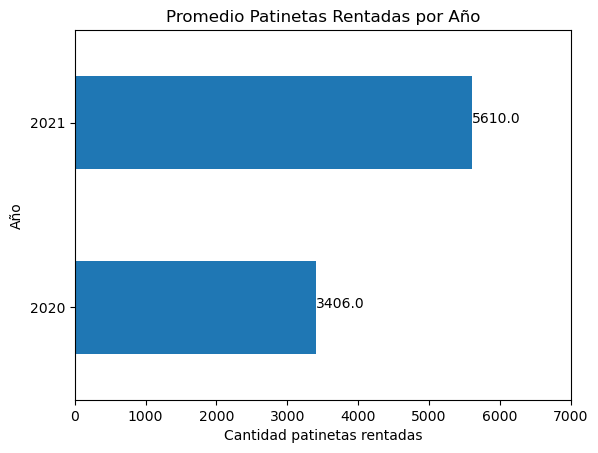

In [183]:
ax = df_EDA.groupby('year')['cnt'].mean().round(0).plot.barh()

ax.set_xlabel('Cantidad patinetas rentadas')
ax.set_ylabel('Año')
ax.set_title('Promedio Patinetas Rentadas por Año')
ax.set_xlim(0, 7000)
for rect in ax.patches:
    ax.text(
        rect.get_width() + .2,
        rect.get_y() + rect.get_height() / 2 ,
        rect.get_width(),
        fontsize=10
    )


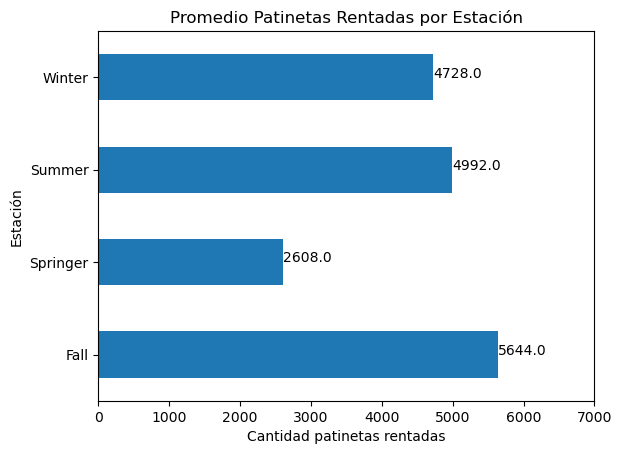

In [186]:
ax = df_EDA.groupby('Season')['cnt'].mean().round(0).plot.barh()

ax.set_xlabel('Cantidad patinetas rentadas')
ax.set_ylabel('Estación')
ax.set_title('Promedio Patinetas Rentadas por Estación')
ax.set_xlim(0, 7000)
for rect in ax.patches:
    ax.text(
        rect.get_width() + .2,
        rect.get_y() + rect.get_height() / 2 ,
        rect.get_width(),
        fontsize=10
    )

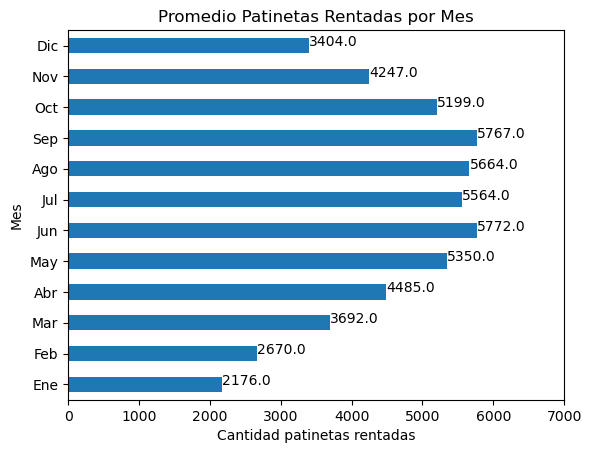

In [203]:
ax = df_EDA.groupby('month')['cnt'].mean().round(0).plot.barh()

ax.set_xlabel('Cantidad patinetas rentadas')
ax.set_ylabel('Mes')
ax.set_title('Promedio Patinetas Rentadas por Mes')
ax.set_xlim(0, 7000)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
for rect in ax.patches:
    ax.text(
        rect.get_width() + .2,
        rect.get_y() + rect.get_height() / 2 ,
        rect.get_width(),
        fontsize=10
    )

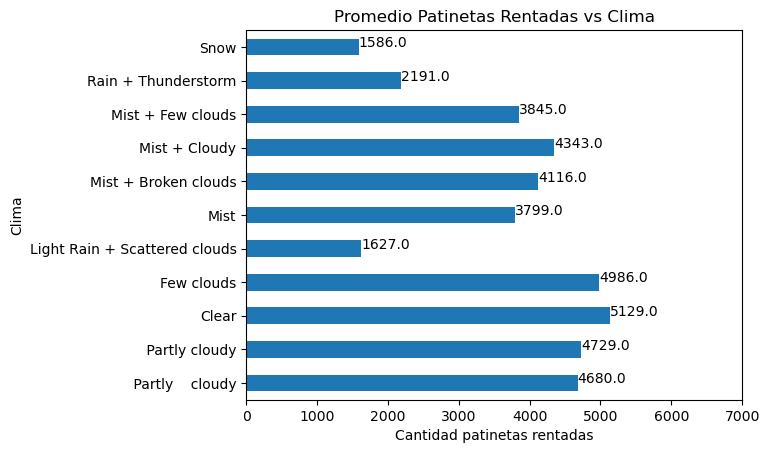

In [218]:
ax = df_EDA.groupby('Weather')['cnt'].mean().round(0).plot.barh()

ax.set_xlabel('Cantidad patinetas rentadas')
ax.set_ylabel('Clima')
ax.set_title('Promedio Patinetas Rentadas vs Clima')
ax.set_xlim(0, 7000)
for rect in ax.patches:
    ax.text(
        rect.get_width() + .2,
        rect.get_y() + rect.get_height() / 2 ,
        rect.get_width(),
        fontsize=10
    )

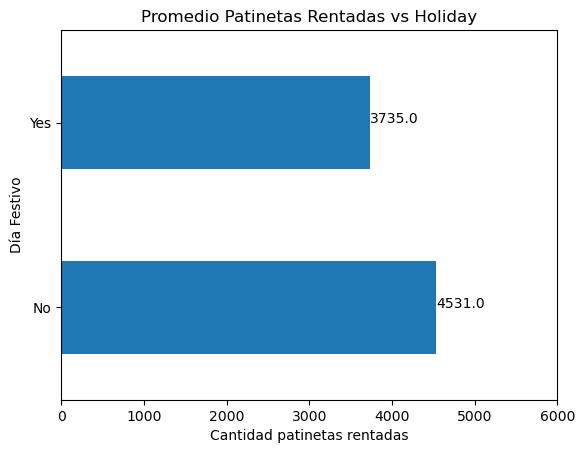

In [219]:
ax = df_EDA.groupby('Holiday')['cnt'].mean().round(0).plot.barh()

ax.set_xlabel('Cantidad patinetas rentadas')
ax.set_ylabel('Día Festivo')
ax.set_title('Promedio Patinetas Rentadas vs Holiday')
ax.set_xlim(0, 6000)
for rect in ax.patches:
    ax.text(
        rect.get_width() + .2,
        rect.get_y() + rect.get_height() / 2 ,
        rect.get_width(),
        fontsize=10
    )

### Analizando la variable objetivo (cnt)

In [220]:
df_EDA['cnt'].describe(percentiles = [.25, .5, .75, .95, .99])

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
95%      7576.400000
99%      8163.810000
max      8714.000000
Name: cnt, dtype: float64

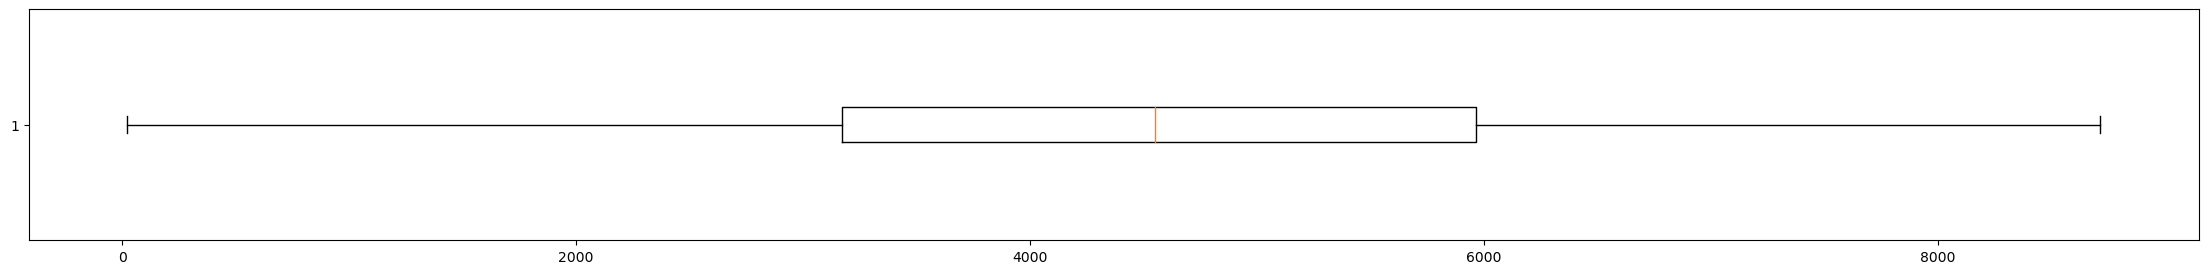

In [226]:
plt.figure(figsize = (28, 3))
plt.boxplot(df_EDA['cnt'], vert = False)
plt.show()

## Desarrollo de Modelos de Regresión

### Regresión Lineal Simple

In [276]:
features = ['Temp', 'Feel_Temp', 'Hum', 'Wind', 'SeasonInt', 'WeatherInt']

In [277]:
df[features + ['cnt']].corr()

,Temp,Feel_Temp,Hum,Wind,SeasonInt,WeatherInt,cnt
Temp,1.000000,0.987651,-0.000371,-0.143495,0.330361,-0.117974,0.624598
Feel_Temp,0.987651,1.000000,-0.021122,-0.171862,0.342014,-0.120559,0.630685
Hum,-0.000371,-0.021122,1.000000,-0.026704,0.006658,0.126021,-0.047720
Wind,-0.143495,-0.171862,-0.026704,1.000000,-0.220753,0.024992,-0.214612
SeasonInt,0.330361,0.342014,0.006658,-0.220753,1.000000,0.021306,0.404584
WeatherInt,-0.117974,-0.120559,0.126021,0.024992,0.021306,1.000000,-0.295929
cnt,0.624598,0.630685,-0.047720,-0.214612,0.404584,-0.295929,1.000000


#### División conjuntos entrenamiento y pruebas

In [278]:
X = df[features]
Y = df['cnt']

In [279]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [280]:
X_train.shape

(584, 6)

In [281]:
X_test.shape

(146, 6)

#### Escalando las características

In [282]:
scaler = StandardScaler()

In [283]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Entrenando el modelo

In [284]:
lin_reg = LinearRegression()

In [285]:
lin_reg.fit(X_train_scaled, Y_train)

LinearRegression()

In [286]:
lin_reg.coef_

array([ 529.35575695,  444.77300981,  -43.2379749 , -143.66623972,
        360.96220112, -436.31510794])

In [288]:
lin_reg.intercept_

4547.921232876713

#### Evaluando el modelo

In [289]:
preds_train = lin_reg.predict(X_train_scaled)
preds_test = lin_reg.predict(X_test_scaled)

In [290]:
mean_absolute_error(Y_train, preds_train), mean_absolute_error(Y_test, preds_test)

(1182.9355533328264, 1095.143124264892)

In [299]:
np.sqrt(mean_squared_error(Y_train, preds_train)), np.sqrt(mean_squared_error(Y_test, preds_test))

(1397.3909453582216, 1253.7501560805943)

#### Análisis del Error

In [300]:
(Y_test - preds_test).describe(percentiles = [.25, .5, .75, .95, .99])

count     146.000000
mean       39.406011
std      1257.444443
min     -2441.547137
25%      -955.826025
50%      -329.307207
75%       957.909593
95%      2172.825832
99%      2628.651690
max      2901.072432
Name: cnt, dtype: float64

In [1]:
(Y_test - preds_test).var()

NameError: name 'Y_test' is not defined

<b>Nota:</b> Con la regresión lineal simple el error promedio está al rededor de 0.8 %

### Regresión Lineal Polinomial (Grado 2)

In [363]:
trans2 = PolynomialFeatures(degree=2, include_bias=False)
poly_train2 = trans2.fit_transform(X_train_scaled)
poly_test2 = trans2.fit_transform(X_test_scaled)

In [364]:
lin_regPol = LinearRegression()
lin_regPol.fit(poly_train2, Y_train)

LinearRegression()

In [365]:
lin_regPol.coef_

array([ 1735.69854164,  -832.93515368, -2532.99232642,  -309.99401094,
         295.89731832,    47.05199859, -1179.00624547,   217.33874786,
        -313.09654032,   711.34788732, -1220.57069299,    -5.82068279,
         213.78149841,   -82.22022581,  -761.49910966,  1264.14297223,
         -30.26929028,   149.68551464,  -248.93920511,  -381.32650528,
         150.8531497 ,  -149.63926447,    85.47646214,   -72.86454096,
         -93.93139288,   -42.48792383,  -261.17629574])

In [366]:
lin_regPol.intercept_

5581.473807850421

#### Evaluando el modelo

In [367]:
preds_train_poly = lin_regPol.predict(poly_train2)
preds_test_poly = lin_regPol.predict(poly_test2)

In [368]:
mean_absolute_error(Y_train, preds_train_poly), mean_absolute_error(Y_test, preds_test_poly)

(1014.112354482923, 1155.1871017686658)

In [369]:
np.sqrt(mean_squared_error(Y_train, preds_train_poly)), np.sqrt(mean_squared_error(Y_test, preds_test_poly))

(1181.5260935629724, 1294.4218083341593)

#### Análisis del Error

In [370]:
(Y_test - preds_test_poly).describe(percentiles = [.25, .5, .75, .95, .99])

count     146.000000
mean       79.371229
std      1296.433548
min     -2152.443361
25%     -1146.034313
50%        37.533580
75%      1240.710735
95%      1947.788820
99%      2464.036461
max      3127.681119
Name: cnt, dtype: float64

In [371]:
(Y_test - preds_test_poly).var()

1680739.9433343227

<b>Nota:</b> Con la regresión lineal polinomial el error promedio aumento a 1.76 % y sigue aumentado con grados mayores

### Regresión Lineal Simple con Regularización Ridge (alpha = 100)

In [424]:
ridge_reg1 = Ridge(alpha=100, solver="cholesky")
ridge_reg1.fit(X_train_scaled, Y_train)

Ridge(alpha=100, solver='cholesky')

In [425]:
ridge_reg1.coef_

array([ 458.12382756,  456.33900964,  -42.71350256, -136.56610516,
        325.8185616 , -379.4157507 ])

In [426]:
ridge_reg1.intercept_

4547.921232876713

#### Evaluando el modelo

In [427]:
preds_train_ridge1 = ridge_reg1.predict(X_train_scaled)
preds_test_ridge1 = ridge_reg1.predict(X_test_scaled)

In [428]:
mean_absolute_error(Y_train, preds_train_ridge1), mean_absolute_error(Y_test, preds_test_ridge1)

(1185.6623003792672, 1118.1801896460554)

In [429]:
np.sqrt(mean_squared_error(Y_train, preds_train_ridge1)), np.sqrt(mean_squared_error(Y_test, preds_test_ridge1))

(1401.1469446768006, 1279.6782476401515)

#### Análisis del Error

In [430]:
(Y_test - preds_test_ridge1).describe(percentiles = [.25, .5, .75, .95, .99])

count     146.000000
mean       21.904152
std      1283.895224
min     -2522.204755
25%     -1005.447745
50%      -306.464287
75%       984.802314
95%      2241.782188
99%      2678.225136
max      2886.228048
Name: cnt, dtype: float64

In [431]:
(Y_test - preds_test_ridge1).var()

1648386.9471751966

<b>Nota:</b> Con la regresión lineal simple con regularización (alfa =100) el error promedio disminuyó a 0.48 %